In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('loan_data.csv')  
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [4]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## What is the distribution of loan purposes?


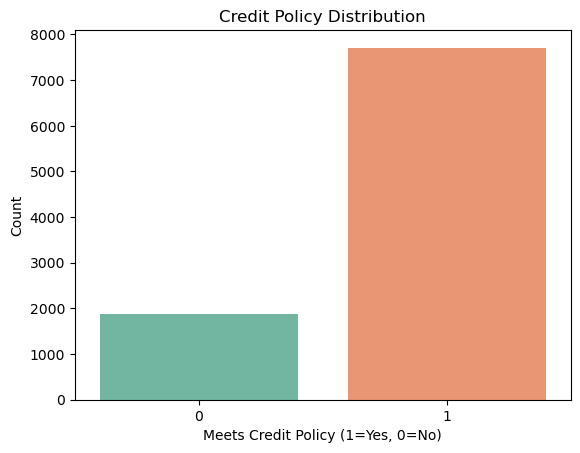

1    80.496972
0    19.503028
Name: credit.policy, dtype: float64


In [7]:
sns.countplot(data=df, x='credit.policy', palette='Set2')
plt.title('Credit Policy Distribution')
plt.xlabel('Meets Credit Policy (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Percentage distribution
policy_dist = df['credit.policy'].value_counts(normalize=True) * 100
print(policy_dist)


## What is the relationship between interest rate and FICO score?

Higher risk borrowers often have higher interest rates and lower FICO score


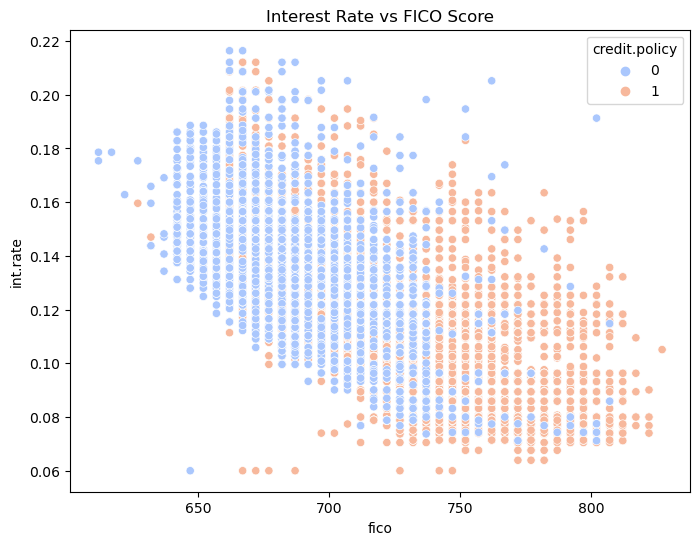

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='fico', y='int.rate', hue='credit.policy', palette='coolwarm')
plt.title('Interest Rate vs FICO Score')
plt.show()


## How does annual income differ between borrowers who meet vs. don’t meet the credit policy?

We can see that the annual income doesnt have a significant difference when taking into consideration the credit policy

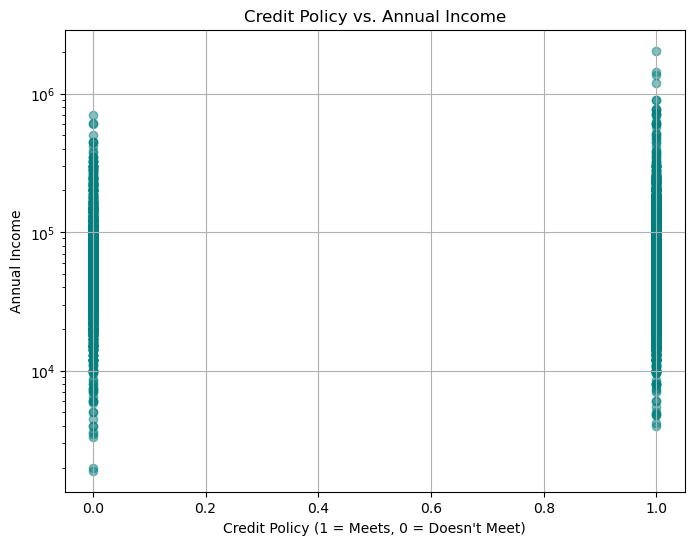

In [9]:
import numpy as np
import matplotlib.pyplot as plt

df['annual_income'] = np.exp(df['log.annual.inc'])

plt.figure(figsize=(8,6))

plt.scatter(df['credit.policy'], df['annual_income'], alpha=0.5, color='teal')
plt.yscale('log') 
plt.xlabel('Credit Policy (1 = Meets, 0 = Doesn\'t Meet)')
plt.ylabel('Annual Income')
plt.title('Credit Policy vs. Annual Income')
plt.grid(True)
plt.show()




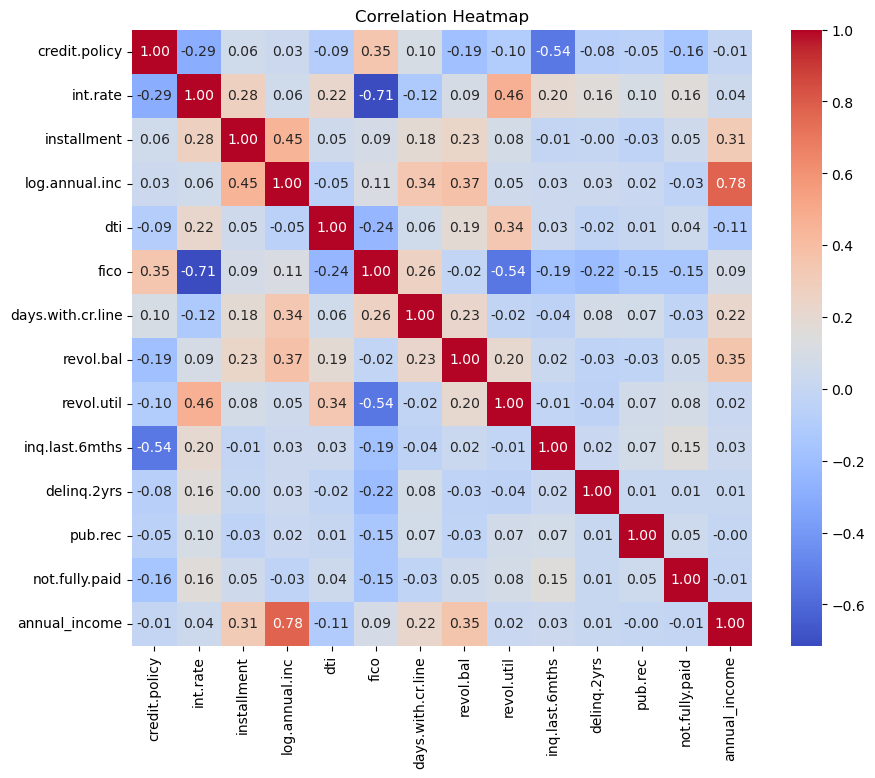

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


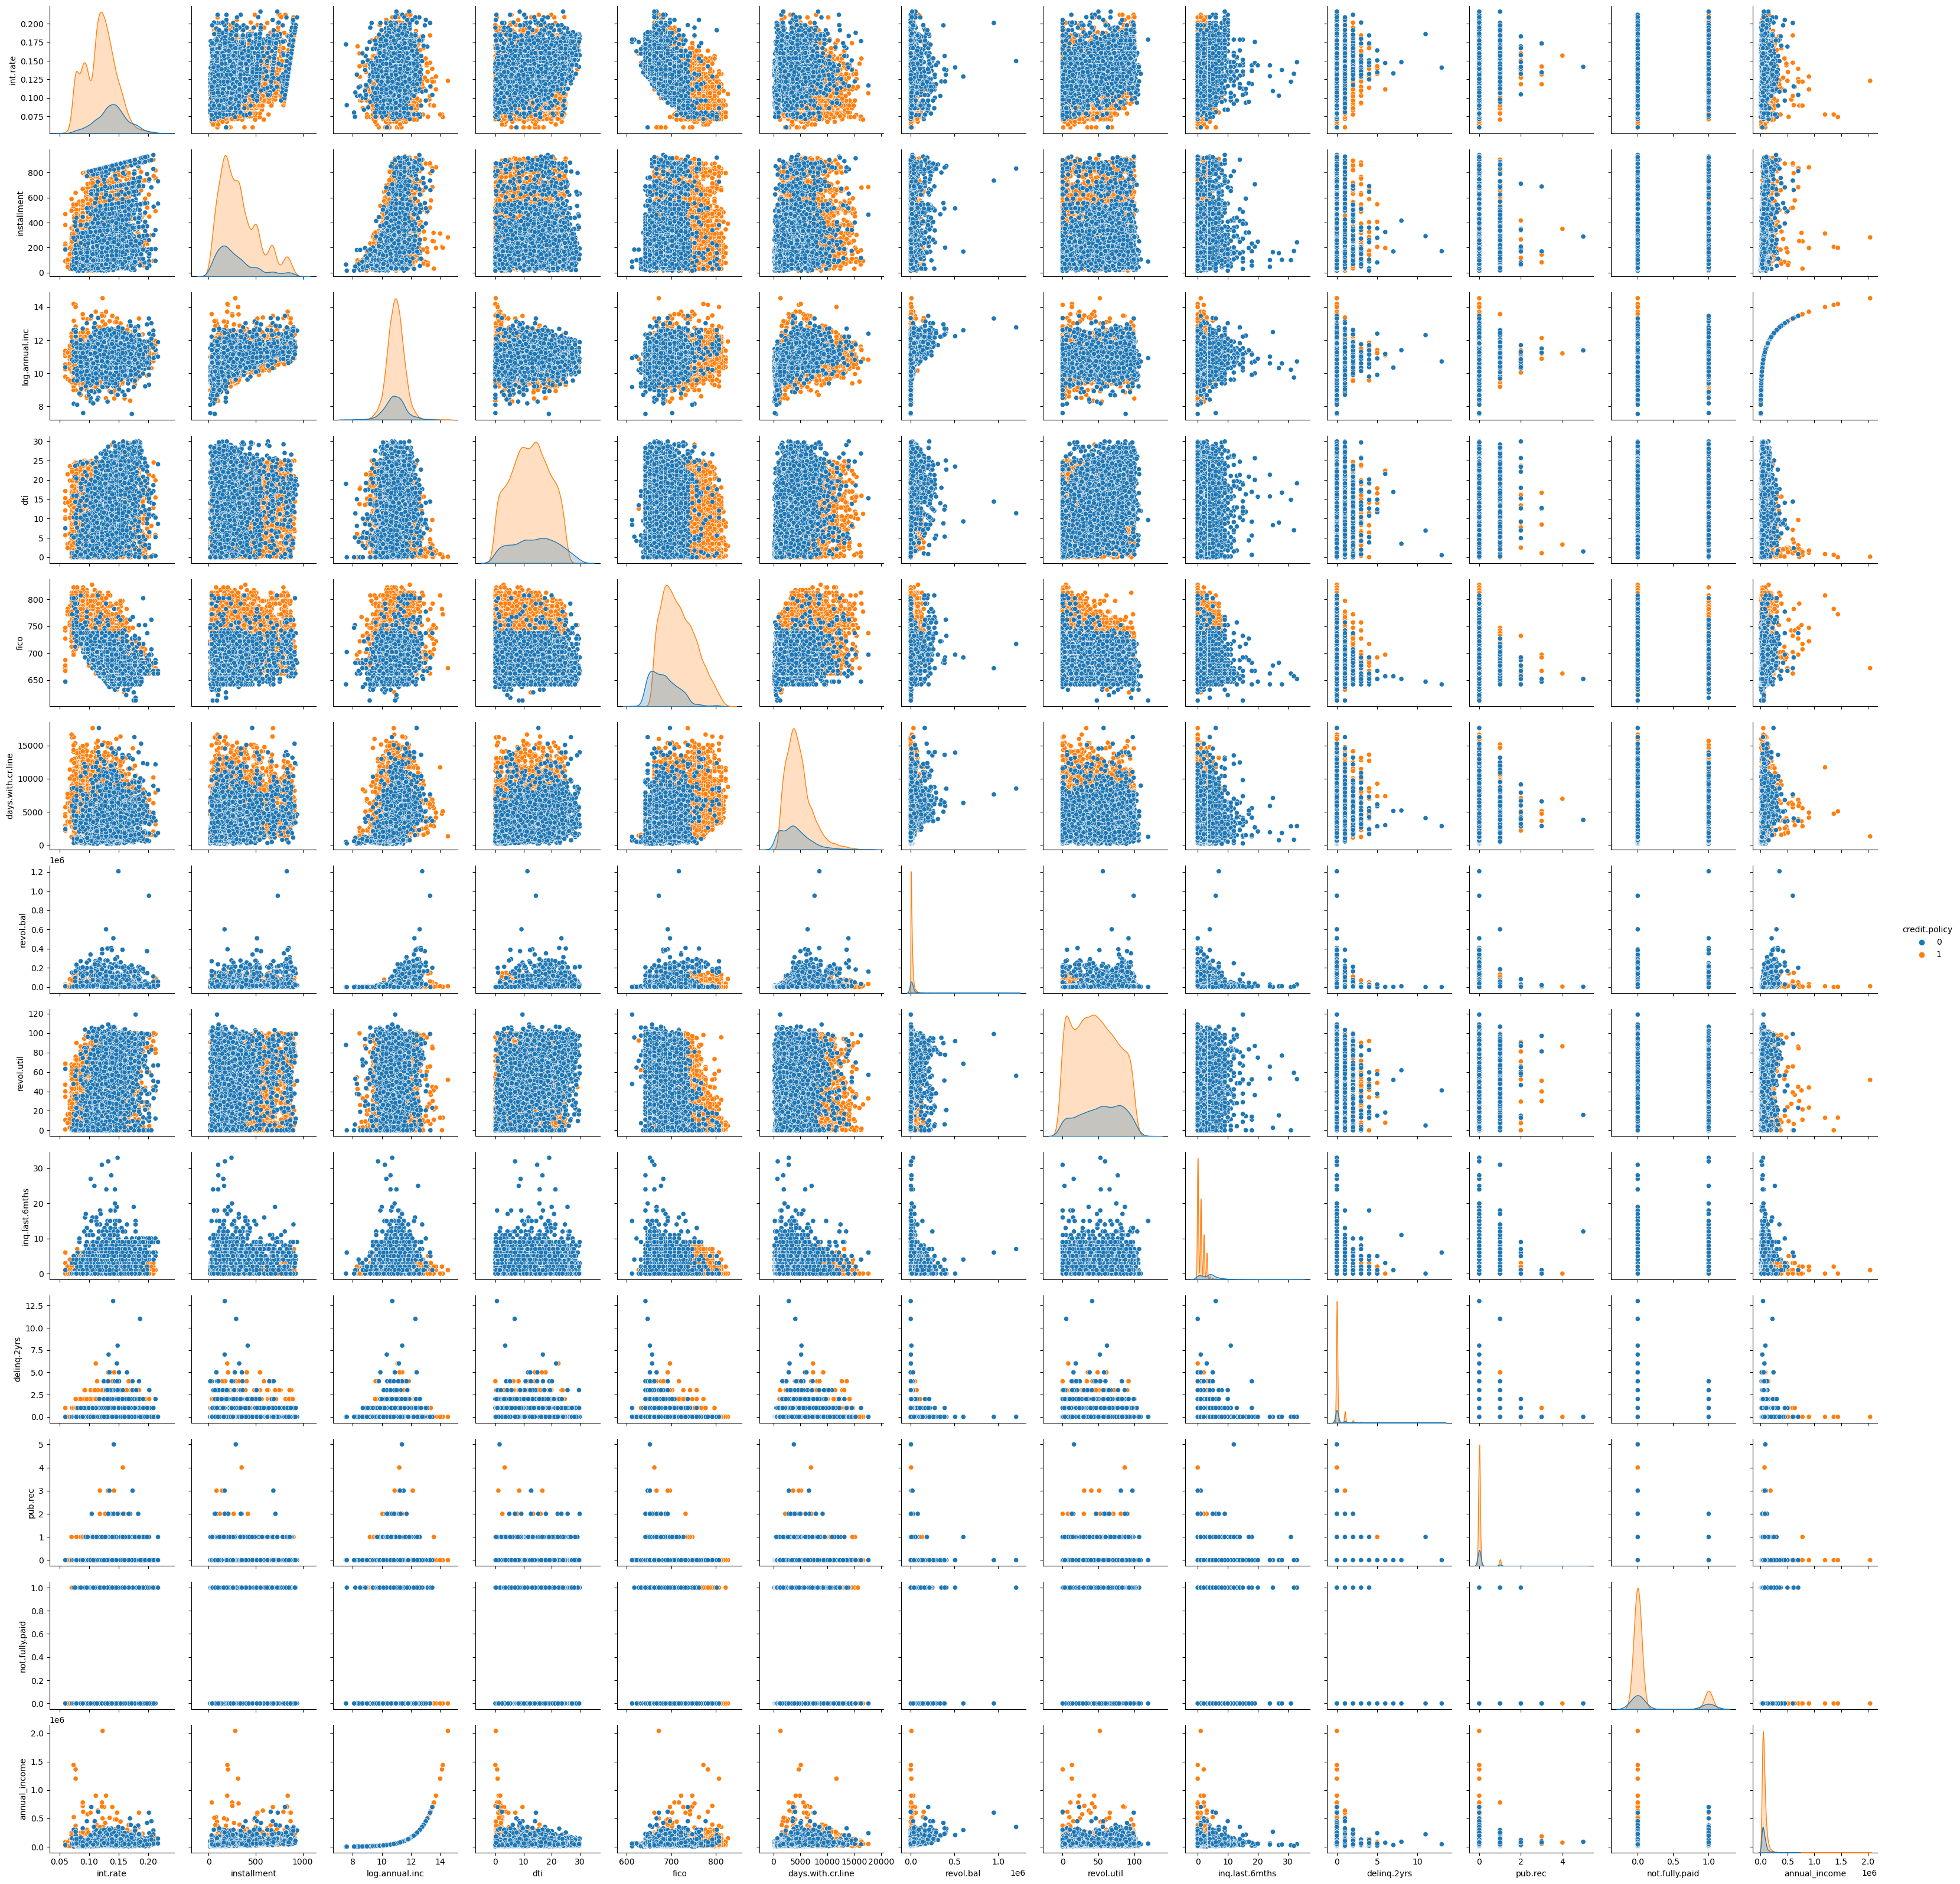

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='credit.policy')
plt.show()


In [14]:
print(df['purpose'].value_counts())


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


In [18]:
#encoding the categorical varaible purpose
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

df.head()


credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  annual_income  purpose_credit_card  \
0        0               0   85000.000385                    0   
1        0               0   65000.000073                    1   
2        0               0   31999.999943                    0   
3        0               0   85000.000385                    0   
4        0               0   80799.999636                    1   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           1                    0                         0   
1                           0                    0                         0   
2                           1                    0                         0   
3                           1                    0                         0   
4                           0                    0                         0   

   purpose_major_purchase  purpose_small_business  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0

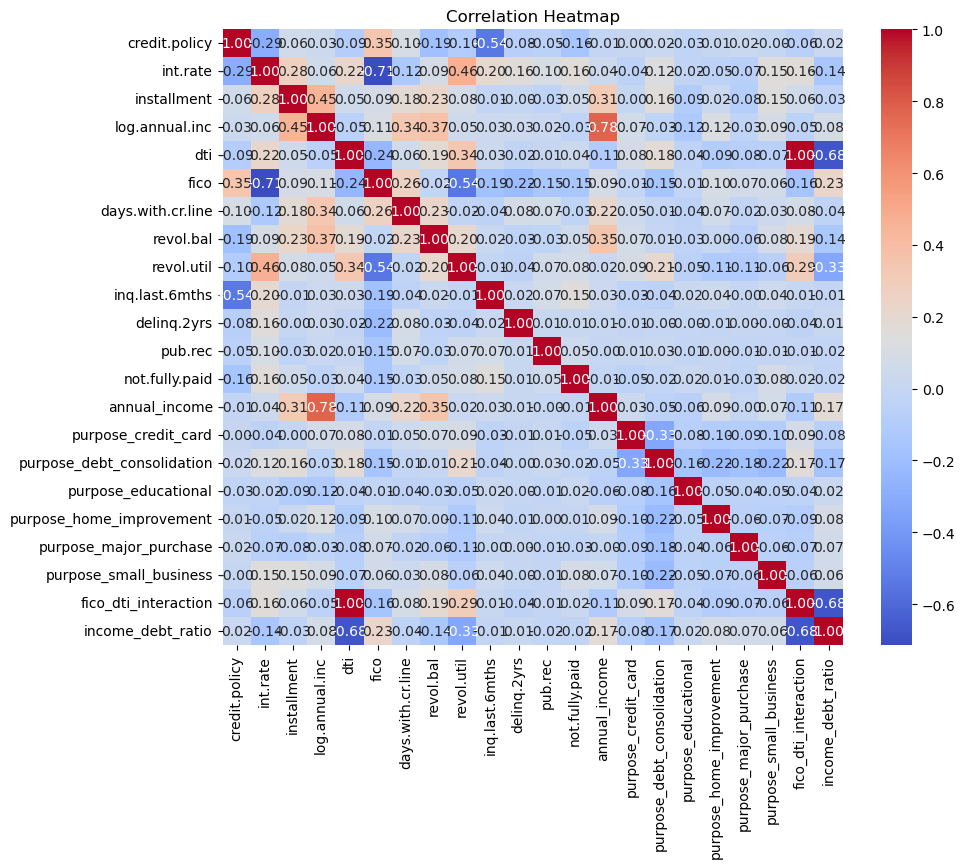

In [24]:
#pearson correlation for linear relationship
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [52]:
df'[int.rate','installment','annual_income','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business','fico_dti_interaction','income_debt_ratio']

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0           5639.958333      28854        52.1               0  ...   
1           2760.000000      33623        76.7               0  ...   
2           4710.000000       3511        25.6               1  ...   
3           2699.958333      33667        73.2               1  ...   
4           4066.000000       4740        39.5               0  ...   
...                 ...        ...         ...             ...  ...   
9573       10474.000000     215372        82.1               2  ...   
9574        4380.000000        184         1.1               5  ...   
9575        3450.041667      10036        82.9               8  ...   
9576        1800.000000          0         3.2               5  ...   
9577        4740.000000      37879        57.0               6  ...   

      not.fully.paid  annual_income  purpose_credit_card  \
0                  0   85000.000385                    0   
1                  0   65000.000073                    1   
2                  0   31999.999943                    0   
3                  0   85000.000385                    0   
4                  0   80799.999636                    1   
...              ...            ...                  ...   
9573               1  195000.000479                    0   
9574               1   68999.999753                    0   
9575               1   39999.999876                    0   
9576               1   49999.999779                    0   
9577               1   78000.000338                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   
9577                           1                    0   

      purpose_home_improvement  purpose_major_purchase  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
...                        ...                     ...   
9573                         0                       0   
9574                         0                       0   
9575                         0                       0   
9576                         1                       0   
9577                         0                       0   

      purpose_small_business  fico_dti_interaction  income_debt_ratio  
0                          0              14356.76           0.554219  
1    

In [20]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  \
count     9578.000000  9578.000000  9578.000000     9578.000000   
mean         1.577469     0.163708     0.062122        0.160054   
std          2.200245     0.546215     0.262126        0.366676   
min          0.000000     0.000000     0.000000        0.000000   
25%          0.000000     0.000000     0.000000        0.000000   
50%          1.000000     0.000000     0.000000        0.000000   
75%          2.000000     0.000000     0.000000        0.000000   
max         33.000000    13.000000     5.000000        1.000000   

       annual_income  purpose_credit_card  purpose_debt_consolidation  \
count   9.578000e+03          9578.000000                 9578.000000   
mean    6.840203e+04             0.131760                    0.413134   
std     6.122753e+04             0.338248                    0.492422   
min     1.896000e+03             0.000000                    0.000000   
25%     3.850000e+04             0.000000                    0.000000   
50%     5.576400e+04             0.000000                    0.000000   
75%     8.012100e+04             0.000000                    1.000000   
max     2.039784e+06             1.000000                    1.000000   

       purpose_educational  purpose_home_improvement  purpose_major_purchase  \
count          9578.000000               9578.000000             9578.000000   
mean              0.035811                  0.065671                0.045625   
std               0.185829                  0.247720                0.208682   
min               0.000000                  0.000000                0.000000   
25%               0.000000                  0.000000                0.000000   
50%               0.000000                  0.000000                0.000000   
75%               0.000000                  0.000000                0.000000   
max               1.000000                  1.000000                1.000000   

       purpose_small_business  
count             9578.000000  
mean                 0.064627  
std                  0.245880  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('credit.policy', axis=1)
y = df['credit.policy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8903966597077244

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.52      0.65       561
           1       0.89      0.98      0.94      2313

    accuracy                           0.89      2874
   macro avg       0.88      0.75      0.79      2874
weighted avg       0.89      0.89      0.88      2874


Confusion Matrix:
 [[ 292  269]
 [  46 2267]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9860821155184412

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       561
           1       0.99      1.00      0.99      2313

    accuracy                           0.99      2874
   macro avg       0.99      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874


Confusion Matrix:
 [[ 527   34]
 [   6 2307]]


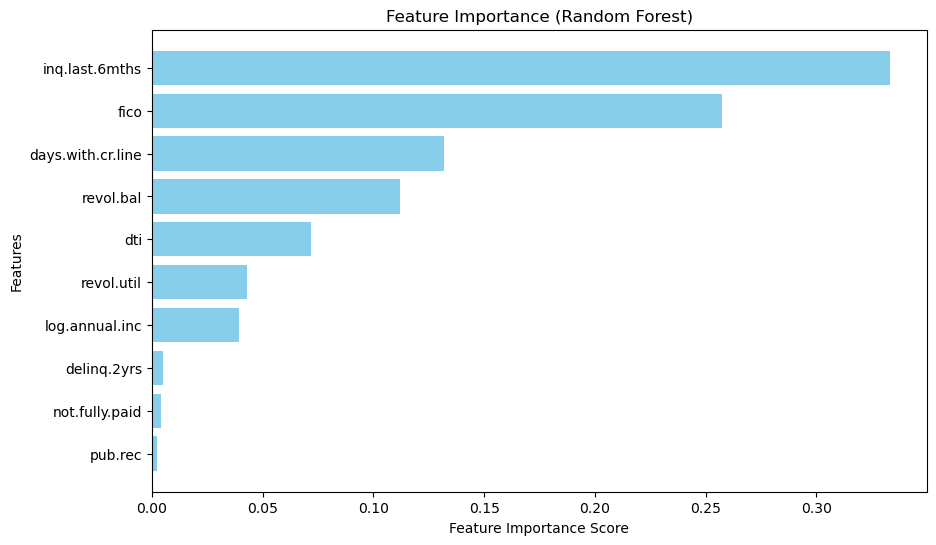

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_importance = rf.feature_importances_

features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis() 
plt.show()

In [64]:
X

log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 10 columns]

## Initial Results

#### Random Forest performs really well with an accuracy of 0.98. There may be overfitting involved, so lets try to fix that.

### Steps to tackle overfitting:
#### 1) Creating a balanced dataset.
#### 2) Feature Engineering - getting rid of columns that have lesser correlation
#### 1) Regularization

In [51]:
X[]

int.rate  installment  log.annual.inc    dti  fico  days.with.cr.line  \
0       0.1189       829.10       11.350407  19.48   737        5639.958333   
1       0.1071       228.22       11.082143  14.29   707        2760.000000   
2       0.1357       366.86       10.373491  11.63   682        4710.000000   
3       0.1008       162.34       11.350407   8.10   712        2699.958333   
4       0.1426       102.92       11.299732  14.97   667        4066.000000   
...        ...          ...             ...    ...   ...                ...   
9573    0.1461       344.76       12.180755  10.39   672       10474.000000   
9574    0.1253       257.70       11.141862   0.21   722        4380.000000   
9575    0.1071        97.81       10.596635  13.09   687        3450.041667   
9576    0.1600       351.58       10.819778  19.18   692        1800.000000   
9577    0.1392       853.43       11.264464  16.28   732        4740.000000   

      revol.bal  revol.util  inq.last.6mths  delinq.2yrs  ...  not.fully.paid  \
0         28854        52.1               0            0  ...               0   
1         33623        76.7               0            0  ...               0   
2          3511        25.6               1            0  ...               0   
3         33667        73.2               1            0  ...               0   
4          4740        39.5               0            1  ...               0   
...         ...         ...             ...          ...  ...             ...   
9573     215372        82.1               2            0  ...               1   
9574        184         1.1               5            0  ...               1   
9575      10036        82.9               8            0  ...               1   
9576          0         3.2               5            0  ...               1   
9577      37879        57.0               6            0  ...               1   

      annual_income  purpose_credit_card  purpose_debt_consolidation  \
0      85000.000385                    0                           1   
1      65000.000073                    1                           0   
2      31999.999943                    0                           1   
3      85000.000385                    0                           1   
4      80799.999636                    1                           0   
...             ...                  ...                         ...   
9573  195000.000479                    0                           0   
9574   68999.999753                    0                           0   
9575   39999.999876                    0                           1   
9576   49999.999779                    0                           0   
9577   78000.000338                    0                           1   

      purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                       0                         0                       0   
1                       0                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         0                       0   
...                   ...                       ...                     ...   
9573                    0                         0                       0   
9574                    0                         0                       0   
9575                    0                         0                       0   
9576                    0                         1                       0   
9577                    0                         0                       0   

      purpose_small_business  fico_dti_interaction  income_debt_ratio  
0                          0              14356.76           0.554219  
1                          0              10103.03           0.724797  
2                          0               7931.66    

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(['credit.policy','int.rate','installment','annual_income','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business','fico_dti_interaction','income_debt_ratio'], axis=1)
y = df['credit.policy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

# Model Evaluation
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8420320111343076

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.83      0.67       561
           1       0.95      0.84      0.90      2313

    accuracy                           0.84      2874
   macro avg       0.76      0.84      0.78      2874
weighted avg       0.88      0.84      0.85      2874


Confusion Matrix:
 [[ 468   93]
 [ 361 1952]]


In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9700765483646486

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       561
           1       0.99      0.97      0.98      2313

    accuracy                           0.97      2874
   macro avg       0.94      0.96      0.95      2874
weighted avg       0.97      0.97      0.97      2874


Confusion Matrix:
 [[ 533   28]
 [  58 2255]]


In [60]:
#Logistic regression with regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Logistic Regression with L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', C=1.0, random_state=42)
log_reg_l2.fit(X_train, y_train)

y_pred = log_reg_l2.predict(X_test)
print("Classification Report for L2 Regularization (Ridge):\n", classification_report(y_test, y_pred))

# Logistic Regression with L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
log_reg_l1.fit(X_train, y_train)

y_pred = log_reg_l1.predict(X_test)
print("Classification Report for L1 Regularization (Lasso):\n", classification_report(y_test, y_pred))


Classification Report for L2 Regularization (Ridge):
               precision    recall  f1-score   support

           0       0.56      0.83      0.67       561
           1       0.95      0.84      0.90      2313

    accuracy                           0.84      2874
   macro avg       0.76      0.84      0.78      2874
weighted avg       0.88      0.84      0.85      2874

Classification Report for L1 Regularization (Lasso):
               precision    recall  f1-score   support

           0       0.58      0.86      0.69       561
           1       0.96      0.85      0.90      2313

    accuracy                           0.85      2874
   macro avg       0.77      0.85      0.79      2874
weighted avg       0.89      0.85      0.86      2874

